## Problem 2: Create buffers around shopping centers (7 points)

Let’s continue with our case study and calculate a 1.5 km buffer around the geocoded points. 

### a) Load the shopping centre data set (1 point)

First, load the shopping centre *point* data set you created in *problem 1* into a `GeoDataFrame` called `shopping_centres`.

In [1]:
# ADD YOUR OWN CODE HERE
import pandas
import geopandas
import pathlib
import matplotlib.pyplot as plt

NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_PATH = NOTEBOOK_PATH / "data"
shopping_centres = geopandas.read_file(DATA_PATH /"shopping_centres.gpkg")

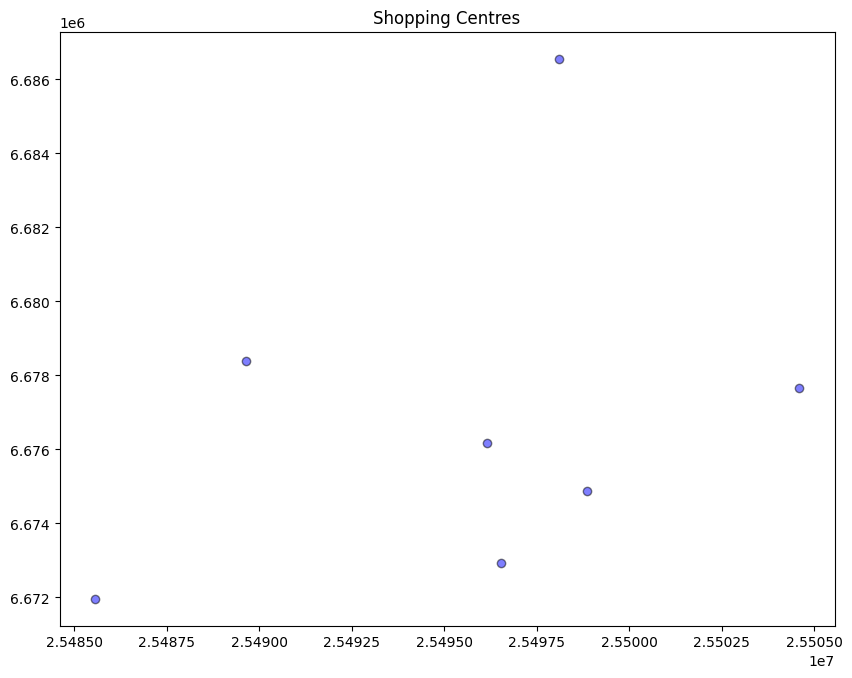

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
shopping_centres.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)
ax.set_title("Shopping Centres")
plt.show()


---

### b) Create a *buffer* around the points (5 points)

Calculate a 1.5 km buffer for each geocoded point. Overwrite the `geometry` column with the new buffer geometry.

Use the [`geopandas.GeoDataFrame.buffer()` method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), that uses shapely’s [`buffer()`](http://toblerity.org/shapely/manual.html#object.buffer) in the background. You only need to care about the `distance` parameter, don’t worry about the possible other arguments.

In [3]:
# ADD YOUR OWN CODE HERE
shopping_centres['geometry'] = shopping_centres['geometry'].buffer(1500)

In [4]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert shopping_centres.geometry.geom_type.unique() == ["Polygon"]

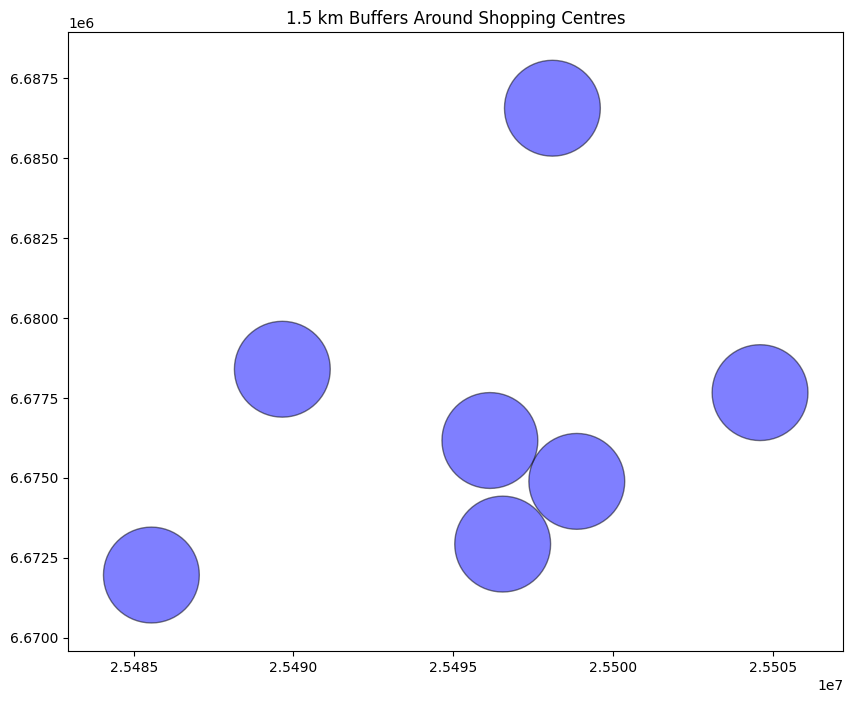

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
shopping_centres.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)
ax.set_title("1.5 km Buffers Around Shopping Centres")
plt.show()


---

### d) Save buffer geometry layer (1 point)

Save the data frame containing the buffer geometries into a new layer `buffers` inside the same *GeoPackage* `shopping_centres.gpkg`:

In [6]:
# ADD YOUR OWN CODE HERE
shopping_centres.to_file(DATA_PATH / "shopping_centres.gpkg", layer='buffers', driver="GPKG")